In [1]:
import ROOT
import numpy as np
from array import array
from ROOT import TCanvas, TFile, TProfile, TNtuple, TH1I, TH1F, TH2F, TH3F, TColor, TEfficiency

Welcome to JupyROOT 6.26/06


In [2]:
%cd /sphenix/user/egm2153/calib_study/detdeta/analysis/runs23727_23746/run_by_run_studies

/gpfs/mnt/gpfs02/sphenix/user/egm2153/calib_study/detdeta/analysis/runs23727_23746/run_by_run_studies


In [64]:
#runs = ['23727','23735','23737','23738','23739','23740','23743','23745']
cent = '50-60'
lowbound = {'0-5': 400, '5-10':300, '10-20':200, '20-30':100, '30-40':0, '40-50':0, '50-60':0}
highbound = {'0-5': 1300, '5-10':1200, '10-20':900, '20-30':700, '30-40':550, '40-50':400, '50-60':250}
runs = ['23735','23737','23738','23739','23740','23743','23745']
h_eT_truth_ihcalbin = []
h_eT_truth_ohcalbin = []
h_eT_sim_emcal = []
h_corr_emcal = []
h_eT_sim_ihcal = []
h_corr_ihcal = []
h_eT_sim_ohcal = []
h_corr_ohcal = []
h_eT_sim_calo = []
h_corr_calo = []
h_eT_data_emcal = []
h_eT_data_ihcal = []
h_eT_data_ohcal = []
h_eT_data_calo = []

for i, run in enumerate(runs):
    datafile = 'dETdeta_analysis_'+run+'_4_4_24_zs_30ADC_data_noweight_'+cent+'.root'
    hijingfile = 'dETdeta_analysis_'+run+'_4_4_24_nozs_mc_reweight_'+cent+'_reweight_hijing.root'
    f = ROOT.TFile.Open(datafile)
    h_eT_data_emcal.append(f.Get("h_eT_emcal"))
    h_eT_data_ihcal.append(f.Get("h_eT_ihcal"))
    h_eT_data_ohcal.append(f.Get("h_eT_ohcal"))
    h_eT_data_calo.append(f.Get("h_eT_calo"))
    h_eT_data_emcal[i].SetDirectory(0)
    h_eT_data_ihcal[i].SetDirectory(0)
    h_eT_data_ohcal[i].SetDirectory(0)
    h_eT_data_calo[i].SetDirectory(0)
    f.Close()
    f = ROOT.TFile.Open(hijingfile)
    h_eT_sim_emcal.append(f.Get("h_eT_emcal"))
    h_eT_sim_ihcal.append(f.Get("h_eT_ihcal"))
    h_eT_sim_ohcal.append(f.Get("h_eT_ohcal"))
    h_eT_sim_calo.append(f.Get("h_eT_calo"))
    h_eT_sim_emcal[i].SetDirectory(0)
    h_eT_sim_ihcal[i].SetDirectory(0)
    h_eT_sim_ohcal[i].SetDirectory(0)
    h_eT_sim_calo[i].SetDirectory(0)
    h_corr_emcal.append(f.Get("h_emcal_correction"))
    h_corr_ihcal.append(f.Get("h_ihcal_correction"))
    h_corr_ohcal.append(f.Get("h_ohcal_correction"))
    h_corr_calo.append(f.Get("h_calo_correction"))
    h_corr_emcal[i].SetDirectory(0)
    h_corr_ihcal[i].SetDirectory(0)
    h_corr_ohcal[i].SetDirectory(0)
    h_corr_calo[i].SetDirectory(0)
    h_eT_truth_ihcalbin.append(f.Get("hetdeta_ihcalbin"))
    h_eT_truth_ihcalbin[i].SetDirectory(0)
    h_eT_truth_ohcalbin.append(f.Get("hetdeta_ohcalbin"))
    h_eT_truth_ohcalbin[i].SetDirectory(0)
    f.Close()

In [65]:
emcal_detdeta = []
ihcal_detdeta = []
ohcal_detdeta = []
calo_detdeta = []
for i, run in enumerate(runs):
    emcal_detdeta.append(TH1F(h_eT_data_emcal[i].Clone('emcal_detdeta_'+run)))
    emcal_detdeta[i].Divide(h_corr_emcal[i])
    ihcal_detdeta.append(TH1F(h_eT_data_ihcal[i].Clone('ihcal_detdeta_'+run)))
    ihcal_detdeta[i].Divide(h_corr_ihcal[i])
    ohcal_detdeta.append(TH1F(h_eT_data_ohcal[i].Clone('ohcal_detdeta_'+run)))
    ohcal_detdeta[i].Divide(h_corr_ohcal[i])
    calo_detdeta.append(TH1F(h_eT_data_calo[i].Clone('calo_detdeta_'+run)))
    calo_detdeta[i].Divide(h_corr_calo[i])
    
hcal_detdeta = []
hcal_corr = []
for i, run in enumerate(runs):
    hcal_detdeta.append(TH1F(h_eT_data_ihcal[i].Clone('hcal_detdeta_'+run)))
    hcal_corr.append(TH1F(h_corr_ihcal[i].Clone('hcal_corr_'+run)))
    for j in range(1, hcal_detdeta[i].GetNbinsX() + 1):
        hcal_detdeta[i].SetBinContent(j, h_eT_data_ihcal[i].GetBinContent(j) + h_eT_data_ohcal[i].GetBinContent(j))
        hcal_detdeta[i].SetBinError(j, 0)
        hcal_corr[i].SetBinContent(j, h_corr_ihcal[i].GetBinContent(j) + h_corr_ohcal[i].GetBinContent(j))
        hcal_corr[i].SetBinError(j, 0)
    hcal_detdeta[i].Divide(hcal_corr[i])

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2024/detdeta_plots/run_by_run_syst/emcal_run_variation_23735_23745_50-60.png has been created


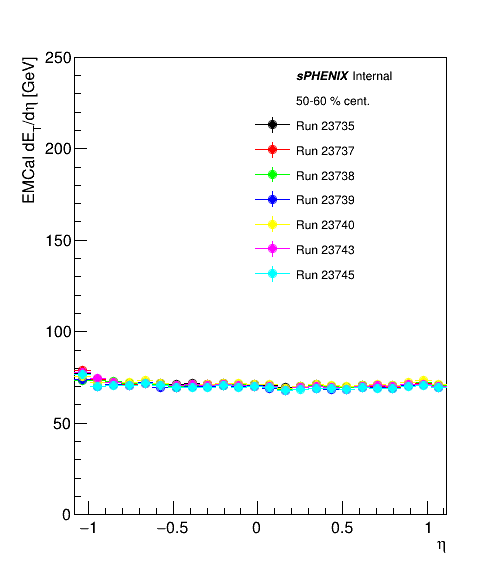

In [324]:
canvas = TCanvas("canvas","",500,600)
leg = ROOT.TLegend(.5,.5,.89,.89)
leg.AddEntry("","#bf{#it{sPHENIX}} Internal","")
leg.AddEntry("",f"{cent} % cent.","")
canvas.SetLeftMargin(0.15)
leg.SetBorderSize(0)
for i in range(len(emcal_detdeta)):
    leg.AddEntry(emcal_detdeta[i],"Run "+runs[i],"lep")
    emcal_detdeta[i].SetStats(0)
    emcal_detdeta[i].SetMarkerStyle(20)
    emcal_detdeta[i].SetLineColor(i+1)
    emcal_detdeta[i].SetMarkerColor(i+1)
    emcal_detdeta[i].GetYaxis().SetRangeUser(lowbound[cent],highbound[cent])
    if i == 0:
        emcal_detdeta[i].SetXTitle("#eta")
        emcal_detdeta[i].SetYTitle("EMCal dE_{T}/d#eta [GeV]")
        emcal_detdeta[i].Draw()
    else:
        emcal_detdeta[i].Draw('same')
leg.Draw()
canvas.Draw()
canvas.SaveAs('/sphenix/u/egm2153/spring_2024/detdeta_plots/run_by_run_syst/emcal_run_variation_23735_23745_'+cent+'.png')

In [66]:
mean_emcal_detdeta = np.zeros(24)
error_emcal_detdeta = np.zeros(24)
sigma_emcal_detdeta = np.zeros(24)
for i in range(len(emcal_detdeta)):
    for j in range(1, emcal_detdeta[0].GetNbinsX() + 1):
        mean_emcal_detdeta[j-1] += emcal_detdeta[i].GetBinContent(j)
        error_emcal_detdeta[j-1] += emcal_detdeta[i].GetBinError(j)
for i in range(len(mean_emcal_detdeta)):
    mean_emcal_detdeta[i] /= 7.0
    error_emcal_detdeta[i] /= 7.0
for i in range(len(emcal_detdeta)):
    for j in range(1, emcal_detdeta[0].GetNbinsX() + 1):
        sigma_emcal_detdeta[j-1] += (emcal_detdeta[i].GetBinContent(j) - mean_emcal_detdeta[j-1])**2
for i in range(len(sigma_emcal_detdeta)):
    sigma_emcal_detdeta[i] /= 7.0
    sigma_emcal_detdeta[i] = np.sqrt(sigma_emcal_detdeta[i])

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2024/detdeta_plots/run_by_run_syst/ihcal_run_variation_23735_23745_50-60.png has been created


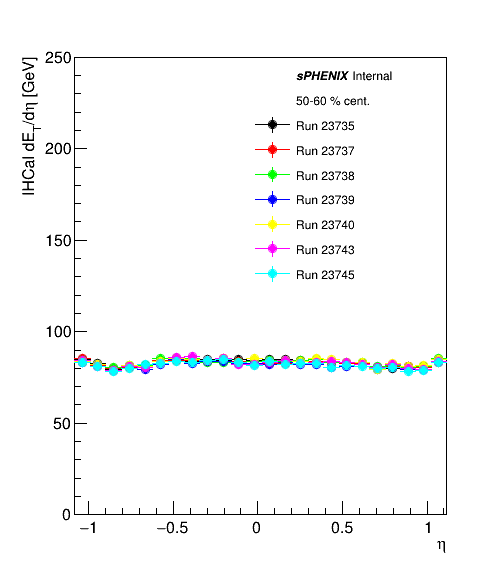

In [326]:
canvas = TCanvas("canvas","",500,600)
leg = ROOT.TLegend(.5,.5,.89,.89)
leg.AddEntry("","#bf{#it{sPHENIX}} Internal","")
leg.AddEntry("",f"{cent} % cent.","")
canvas.SetLeftMargin(0.15)
leg.SetBorderSize(0)
for i in range(len(ihcal_detdeta)):
    leg.AddEntry(ihcal_detdeta[i],"Run "+runs[i],"lep")
    ihcal_detdeta[i].SetStats(0)
    ihcal_detdeta[i].SetMarkerStyle(20)
    ihcal_detdeta[i].SetLineColor(i+1)
    ihcal_detdeta[i].SetMarkerColor(i+1)
    ihcal_detdeta[i].GetYaxis().SetRangeUser(lowbound[cent],highbound[cent])
    if i == 0:
        ihcal_detdeta[i].SetXTitle("#eta")
        ihcal_detdeta[i].SetYTitle("IHCal dE_{T}/d#eta [GeV]")
        ihcal_detdeta[i].Draw()
    else:
        ihcal_detdeta[i].Draw('same')
leg.Draw()
canvas.Draw()
canvas.SaveAs('/sphenix/u/egm2153/spring_2024/detdeta_plots/run_by_run_syst/ihcal_run_variation_23735_23745_'+cent+'.png')

In [67]:
mean_ihcal_detdeta = np.zeros(24)
sigma_ihcal_detdeta = np.zeros(24)
error_ihcal_detdeta = np.zeros(24)
for i in range(len(ihcal_detdeta)):
    for j in range(1, ihcal_detdeta[0].GetNbinsX() + 1):
        mean_ihcal_detdeta[j-1] += ihcal_detdeta[i].GetBinContent(j)
        error_ihcal_detdeta[j-1] += ihcal_detdeta[i].GetBinError(j)
for i in range(len(mean_ihcal_detdeta)):
    mean_ihcal_detdeta[i] /= 7.0
    error_ihcal_detdeta[i] /= 7.0
for i in range(len(ihcal_detdeta)):
    for j in range(1, ihcal_detdeta[0].GetNbinsX() + 1):
        sigma_ihcal_detdeta[j-1] += (ihcal_detdeta[i].GetBinContent(j) - mean_ihcal_detdeta[j-1])**2
for i in range(len(sigma_ihcal_detdeta)):
    sigma_ihcal_detdeta[i] /= 7.0
    sigma_ihcal_detdeta[i] = np.sqrt(sigma_ihcal_detdeta[i])

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


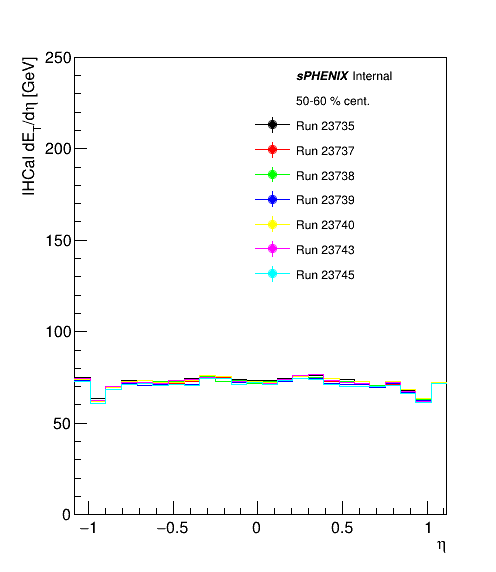

In [68]:
canvas = TCanvas("canvas","",500,600)
leg = ROOT.TLegend(.5,.5,.89,.89)
leg.AddEntry("","#bf{#it{sPHENIX}} Internal","")
leg.AddEntry("",f"{cent} % cent.","")
canvas.SetLeftMargin(0.15)
leg.SetBorderSize(0)
for i in range(len(hcal_detdeta)):
    leg.AddEntry(hcal_detdeta[i],"Run "+runs[i],"lep")
    hcal_detdeta[i].SetStats(0)
    hcal_detdeta[i].SetMarkerStyle(20)
    hcal_detdeta[i].SetLineColor(i+1)
    hcal_detdeta[i].SetMarkerColor(i+1)
    hcal_detdeta[i].GetYaxis().SetRangeUser(lowbound[cent],highbound[cent])
    if i == 0:
        hcal_detdeta[i].SetXTitle("#eta")
        hcal_detdeta[i].SetYTitle("IHCal dE_{T}/d#eta [GeV]")
        hcal_detdeta[i].Draw()
    else:
        hcal_detdeta[i].Draw('same')
leg.Draw()
canvas.Draw()
#canvas.SaveAs('/sphenix/u/egm2153/spring_2024/detdeta_plots/run_by_run_syst/ihcal_run_variation_23735_23745_'+cent+'.png')

In [69]:
mean_hcal_detdeta = np.zeros(24)
sigma_hcal_detdeta = np.zeros(24)
error_hcal_detdeta = np.zeros(24)
for i in range(len(hcal_detdeta)):
    for j in range(1, hcal_detdeta[0].GetNbinsX() + 1):
        mean_hcal_detdeta[j-1] += hcal_detdeta[i].GetBinContent(j)
        error_hcal_detdeta[j-1] += hcal_detdeta[i].GetBinError(j)
for i in range(len(mean_hcal_detdeta)):
    mean_hcal_detdeta[i] /= 7.0
    error_hcal_detdeta[i] /= 7.0
for i in range(len(hcal_detdeta)):
    for j in range(1, hcal_detdeta[0].GetNbinsX() + 1):
        sigma_hcal_detdeta[j-1] += (hcal_detdeta[i].GetBinContent(j) - mean_hcal_detdeta[j-1])**2
for i in range(len(sigma_hcal_detdeta)):
    sigma_hcal_detdeta[i] /= 7.0
    sigma_hcal_detdeta[i] = np.sqrt(sigma_hcal_detdeta[i])

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2024/detdeta_plots/run_by_run_syst/ohcal_run_variation_23735_23745_50-60.png has been created


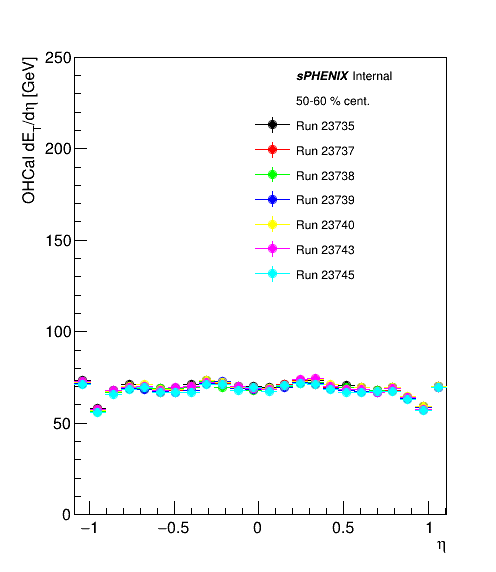

In [328]:
canvas = TCanvas("canvas","",500,600)
leg = ROOT.TLegend(.5,.5,.89,.89)
leg.AddEntry("","#bf{#it{sPHENIX}} Internal","")
leg.AddEntry("",f"{cent} % cent.","")
canvas.SetLeftMargin(0.15)
leg.SetBorderSize(0)
for i in range(len(ohcal_detdeta)):
    leg.AddEntry(ohcal_detdeta[i],"Run "+runs[i],"lep")
    ohcal_detdeta[i].SetStats(0)
    ohcal_detdeta[i].SetMarkerStyle(20)
    ohcal_detdeta[i].SetLineColor(i+1)
    ohcal_detdeta[i].SetMarkerColor(i+1)
    ohcal_detdeta[i].GetYaxis().SetRangeUser(lowbound[cent],highbound[cent])
    if i == 0:
        ohcal_detdeta[i].SetXTitle("#eta")
        ohcal_detdeta[i].SetYTitle("OHCal dE_{T}/d#eta [GeV]")
        ohcal_detdeta[i].Draw()
    else:
        ohcal_detdeta[i].Draw('same')
leg.Draw()
canvas.Draw()
canvas.SaveAs('/sphenix/u/egm2153/spring_2024/detdeta_plots/run_by_run_syst/ohcal_run_variation_23735_23745_'+cent+'.png')

In [70]:
mean_ohcal_detdeta = np.zeros(24)
sigma_ohcal_detdeta = np.zeros(24)
error_ohcal_detdeta = np.zeros(24)
for i in range(len(ohcal_detdeta)):
    for j in range(1, ohcal_detdeta[0].GetNbinsX() + 1):
        mean_ohcal_detdeta[j-1] += ohcal_detdeta[i].GetBinContent(j)
        error_ohcal_detdeta[j-1] += ohcal_detdeta[i].GetBinError(j)
for i in range(len(mean_ohcal_detdeta)):
    mean_ohcal_detdeta[i] /= 7.0
    error_ohcal_detdeta[i] /= 7.0
for i in range(len(ohcal_detdeta)):
    for j in range(1, ohcal_detdeta[0].GetNbinsX() + 1):
        sigma_ohcal_detdeta[j-1] += (ohcal_detdeta[i].GetBinContent(j) - mean_ohcal_detdeta[j-1])**2
for i in range(len(sigma_ohcal_detdeta)):
    sigma_ohcal_detdeta[i] /= 7.0
    sigma_ohcal_detdeta[i] = np.sqrt(sigma_ohcal_detdeta[i])

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2024/detdeta_plots/run_by_run_syst/calo_run_variation_23735_23745_50-60.png has been created


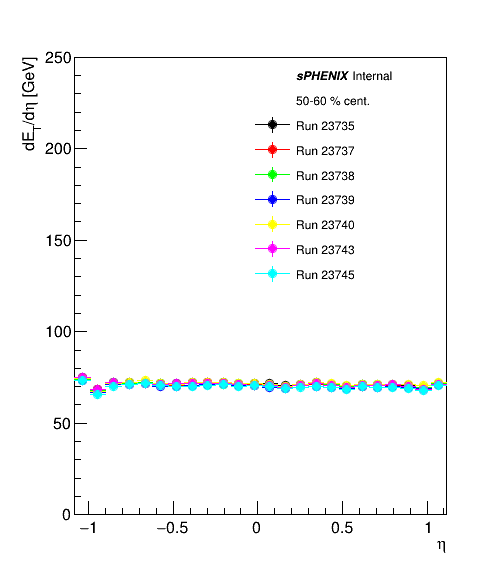

In [330]:
canvas = TCanvas("canvas","",500,600)
leg = ROOT.TLegend(.5,.5,.89,.89)
leg.AddEntry("","#bf{#it{sPHENIX}} Internal","")
leg.AddEntry("",f"{cent} % cent.","")
canvas.SetLeftMargin(0.15)
leg.SetBorderSize(0)
for i in range(len(calo_detdeta)):
    leg.AddEntry(calo_detdeta[i],"Run "+runs[i],"lep")
    calo_detdeta[i].SetStats(0)
    calo_detdeta[i].SetMarkerStyle(20)
    calo_detdeta[i].SetLineColor(i+1)
    calo_detdeta[i].SetMarkerColor(i+1)
    calo_detdeta[i].GetYaxis().SetRangeUser(lowbound[cent],highbound[cent])
    if i == 0:
        calo_detdeta[i].SetXTitle("#eta")
        calo_detdeta[i].SetYTitle("dE_{T}/d#eta [GeV]")
        calo_detdeta[i].Draw()
    else:
        calo_detdeta[i].Draw('same')
leg.Draw()
canvas.Draw()
canvas.SaveAs('/sphenix/u/egm2153/spring_2024/detdeta_plots/run_by_run_syst/calo_run_variation_23735_23745_'+cent+'.png')

In [71]:
mean_calo_detdeta = np.zeros(24)
sigma_calo_detdeta = np.zeros(24)
error_calo_detdeta = np.zeros(24)
for i in range(len(calo_detdeta)):
    for j in range(1, calo_detdeta[0].GetNbinsX() + 1):
        mean_calo_detdeta[j-1] += calo_detdeta[i].GetBinContent(j)
        error_calo_detdeta[j-1] += calo_detdeta[i].GetBinError(j)
for i in range(len(mean_calo_detdeta)):
    mean_calo_detdeta[i] /= 7.0
    error_calo_detdeta[i] /= 7.0
for i in range(len(calo_detdeta)):
    for j in range(1, calo_detdeta[0].GetNbinsX() + 1):
        sigma_calo_detdeta[j-1] += (calo_detdeta[i].GetBinContent(j) - mean_calo_detdeta[j-1])**2
for i in range(len(sigma_calo_detdeta)):
    sigma_calo_detdeta[i] /= 7.0
    sigma_calo_detdeta[i] = np.sqrt(sigma_calo_detdeta[i])

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2024/detdeta_plots/run_by_run_syst/run_variation_rms_ratio_23735_23745_50-60.png has been created


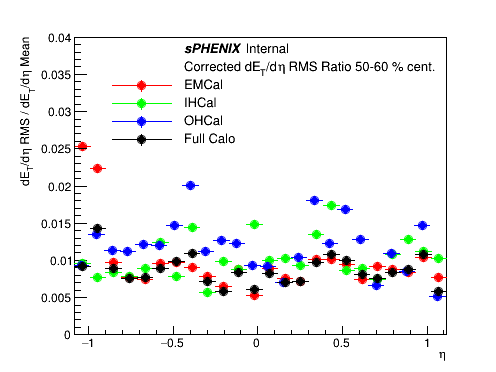

In [332]:
emcal_sigma = TH1F(emcal_detdeta[0].Clone("emcal_sigma"))
ihcal_sigma = TH1F(ihcal_detdeta[0].Clone("ihcal_sigma"))
ohcal_sigma = TH1F(ohcal_detdeta[0].Clone("ohcal_sigma"))
calo_sigma = TH1F(calo_detdeta[0].Clone("calo_sigma"))

for i in range(1, emcal_sigma.GetNbinsX() + 1):
    emcal_sigma.SetBinContent(i, sigma_emcal_detdeta[i-1]/mean_emcal_detdeta[i-1])
    ihcal_sigma.SetBinContent(i, sigma_ihcal_detdeta[i-1]/mean_ihcal_detdeta[i-1])
    ohcal_sigma.SetBinContent(i, sigma_ohcal_detdeta[i-1]/mean_ohcal_detdeta[i-1])
    calo_sigma.SetBinContent(i, sigma_calo_detdeta[i-1]/mean_calo_detdeta[i-1])
    emcal_sigma.SetBinError(i, 0.0001)
    ihcal_sigma.SetBinError(i, 0.0001)
    ohcal_sigma.SetBinError(i, 0.0001)
    calo_sigma.SetBinError(i, 0.0001)

canvas = TCanvas("canvas","",500,400)
leg = ROOT.TLegend(.2,.6,.89,.89)
leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
leg.AddEntry("","Corrected dE_{T}/d#eta RMS Ratio "+cent+" % cent.","")
leg.AddEntry(emcal_sigma,"EMCal","lep")
leg.AddEntry(ihcal_sigma,"IHCal","lep")
leg.AddEntry(ohcal_sigma,"OHCal","lep")
leg.AddEntry(calo_sigma,"Full Calo","lep")
canvas.SetLeftMargin(0.15)
leg.SetBorderSize(0)
emcal_sigma.SetStats(0)
emcal_sigma.SetMarkerStyle(20)
emcal_sigma.SetYTitle("dE_{T}/d#eta RMS / dE_{T}/d#eta Mean")
ihcal_sigma.SetMarkerStyle(20)
ohcal_sigma.SetMarkerStyle(20)
emcal_sigma.SetLineColor(2)
emcal_sigma.SetMarkerColor(2)
ihcal_sigma.SetLineColor(3)
ihcal_sigma.SetMarkerColor(3)
ohcal_sigma.SetLineColor(4)
ohcal_sigma.SetMarkerColor(4)
calo_sigma.SetLineColor(1)
calo_sigma.SetMarkerColor(1)
emcal_sigma.GetYaxis().SetRangeUser(0,0.04)
ihcal_sigma.GetYaxis().SetRangeUser(0,0.04)
ohcal_sigma.GetYaxis().SetRangeUser(0,0.04)
calo_sigma.GetYaxis().SetRangeUser(0,0.04)
emcal_sigma.Draw()
ihcal_sigma.Draw("same")
ohcal_sigma.Draw("same")
calo_sigma.Draw("same")
leg.Draw()
canvas.Draw()
canvas.SaveAs('/sphenix/u/egm2153/spring_2024/detdeta_plots/run_by_run_syst/run_variation_rms_ratio_23735_23745_'+cent+'.png')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


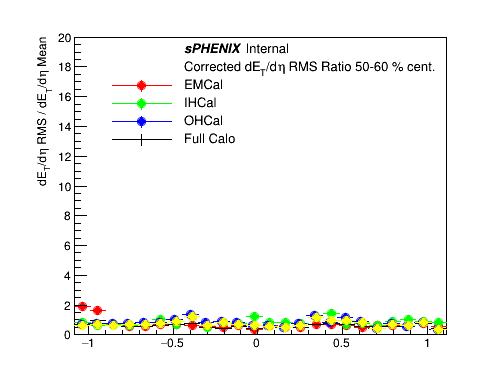

In [72]:
emcal_sigma = TH1F(emcal_detdeta[0].Clone("emcal_detdeta_dev"))
ihcal_sigma = TH1F(ihcal_detdeta[0].Clone("ihcal_detdeta_dev"))
ohcal_sigma = TH1F(ohcal_detdeta[0].Clone("ohcal_detdeta_dev"))
calo_sigma = TH1F(calo_detdeta[0].Clone("calo_detdeta_dev"))
hcal_sigma = TH1F(hcal_detdeta[0].Clone("hcal_detdeta_dev"))

for i in range(1, emcal_sigma.GetNbinsX() + 1):
    emcal_sigma.SetBinContent(i, sigma_emcal_detdeta[i-1]) 
    ihcal_sigma.SetBinContent(i, sigma_ihcal_detdeta[i-1]) 
    ohcal_sigma.SetBinContent(i, sigma_ohcal_detdeta[i-1]) 
    calo_sigma.SetBinContent(i, sigma_calo_detdeta[i-1]) 
    hcal_sigma.SetBinContent(i, sigma_hcal_detdeta[i-1])
    emcal_sigma.SetBinError(i, 0.0001)
    ihcal_sigma.SetBinError(i, 0.0001)
    ohcal_sigma.SetBinError(i, 0.0001)
    calo_sigma.SetBinError(i, 0.0001)
    hcal_sigma.SetBinError(i, 0.0001)

canvas = TCanvas("canvas","",500,400)
leg = ROOT.TLegend(.2,.6,.89,.89)
leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
leg.AddEntry("","Corrected dE_{T}/d#eta RMS Ratio "+cent+" % cent.","")
leg.AddEntry(emcal_sigma,"EMCal","lep")
leg.AddEntry(ihcal_sigma,"IHCal","lep")
leg.AddEntry(ohcal_sigma,"OHCal","lep")
leg.AddEntry(calo_sigma,"Full Calo","lep")
canvas.SetLeftMargin(0.15)
leg.SetBorderSize(0)
emcal_sigma.SetStats(0)
emcal_sigma.SetMarkerStyle(20)
emcal_sigma.SetYTitle("dE_{T}/d#eta RMS / dE_{T}/d#eta Mean")
ihcal_sigma.SetMarkerStyle(20)
ohcal_sigma.SetMarkerStyle(20)
emcal_sigma.SetLineColor(2)
emcal_sigma.SetMarkerColor(2)
ihcal_sigma.SetLineColor(3)
ihcal_sigma.SetMarkerColor(3)
ohcal_sigma.SetLineColor(4)
ohcal_sigma.SetMarkerColor(4)
calo_sigma.SetLineColor(1)
calo_sigma.SetMarkerColor(1)
hcal_sigma.SetMarkerStyle(20)
hcal_sigma.SetLineColor(5)
hcal_sigma.SetMarkerColor(5)
emcal_sigma.GetYaxis().SetRangeUser(0,20)
ihcal_sigma.GetYaxis().SetRangeUser(0,20)
ohcal_sigma.GetYaxis().SetRangeUser(0,20)
calo_sigma.GetYaxis().SetRangeUser(0,20)
emcal_sigma.Draw()
ihcal_sigma.Draw("same")
ohcal_sigma.Draw("same")
calo_sigma.Draw("same")
hcal_sigma.Draw('same')
leg.Draw()
canvas.Draw()
#canvas.SaveAs('/sphenix/u/egm2153/spring_2024/detdeta_plots/run_by_run_syst/run_variation_rms_23735_23745_'+cent+'.png')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2024/detdeta_plots/run_by_run_syst/run_variation_stat_unc_ratio_23735_23745_50-60.png has been created


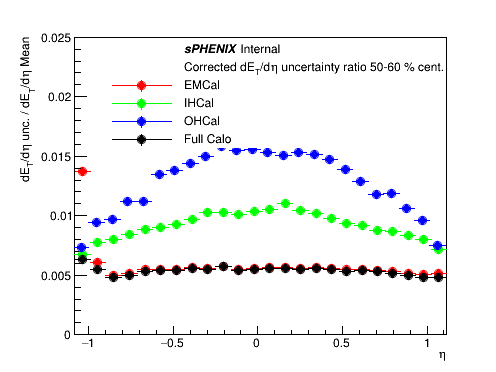

In [334]:
emcal_error = TH1F(emcal_detdeta[0].Clone("emcal_error"))
ihcal_error = TH1F(ihcal_detdeta[0].Clone("ihcal_error"))
ohcal_error = TH1F(ohcal_detdeta[0].Clone("ohcal_error"))
calo_error = TH1F(calo_detdeta[0].Clone("calo_error"))

for i in range(1, emcal_error.GetNbinsX() + 1):
    emcal_error.SetBinContent(i, error_emcal_detdeta[i-1]/mean_emcal_detdeta[i-1])
    ihcal_error.SetBinContent(i, error_ihcal_detdeta[i-1]/mean_ihcal_detdeta[i-1])
    ohcal_error.SetBinContent(i, error_ohcal_detdeta[i-1]/mean_ohcal_detdeta[i-1])
    calo_error.SetBinContent(i, error_calo_detdeta[i-1]/mean_calo_detdeta[i-1])
    emcal_error.SetBinError(i, 0.0001)
    ihcal_error.SetBinError(i, 0.0001)
    ohcal_error.SetBinError(i, 0.0001)
    calo_error.SetBinError(i, 0.0001)

canvas = TCanvas("canvas","",500,400)
leg = ROOT.TLegend(.2,.6,.89,.89)
leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
leg.AddEntry("","Corrected dE_{T}/d#eta uncertainty ratio "+cent+" % cent.","")
leg.AddEntry(emcal_error,"EMCal","lep")
leg.AddEntry(ihcal_error,"IHCal","lep")
leg.AddEntry(ohcal_error,"OHCal","lep")
leg.AddEntry(calo_error,"Full Calo","lep")
canvas.SetLeftMargin(0.15)
leg.SetBorderSize(0)
emcal_error.SetStats(0)
emcal_error.SetMarkerStyle(20)
emcal_error.SetYTitle("dE_{T}/d#eta unc. / dE_{T}/d#eta Mean")
ihcal_error.SetMarkerStyle(20)
ohcal_error.SetMarkerStyle(20)
emcal_error.SetLineColor(2)
emcal_error.SetMarkerColor(2)
ihcal_error.SetLineColor(3)
ihcal_error.SetMarkerColor(3)
ohcal_error.SetLineColor(4)
ohcal_error.SetMarkerColor(4)
calo_error.SetLineColor(1)
calo_error.SetMarkerColor(1)
emcal_error.GetYaxis().SetRangeUser(0,0.025)
ihcal_error.GetYaxis().SetRangeUser(0,0.025)
ohcal_error.GetYaxis().SetRangeUser(0,0.025)
calo_error.GetYaxis().SetRangeUser(0,0.025)
emcal_error.Draw()
ihcal_error.Draw("same")
ohcal_error.Draw("same")
calo_error.Draw("same")
leg.Draw()
canvas.Draw()
canvas.SaveAs('/sphenix/u/egm2153/spring_2024/detdeta_plots/run_by_run_syst/run_variation_stat_unc_ratio_23735_23745_'+cent+'.png')

In [73]:
outfile = ROOT.TFile.Open('dETdeta_variation_run_by_run_w_hcal_'+cent+'.root',"RECREATE")
emcal_sigma.Write()
ihcal_sigma.Write()
ohcal_sigma.Write()
calo_sigma.Write()
hcal_sigma.Write()
outfile.Write()
outfile.Close()